In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('./data/movies_train.csv')
test = pd.read_csv('./data/movies_test.csv')

train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [2]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


- title : 영화의 제목
- distributor : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝수
- num_actor : 주연배우수
- box_off_num : 관객수

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [5]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


1. object 형식의 데이터가 많다.
2. 실제 모델을 만들 때는 어떤 데이터에서든 Null값이 존재할 수 있지만, 일단 지금의 train, test 데이터에서는 dir_prev_bfnum 항목에서만 Null값이 존재하며 절반 이상이 Null값이다.
3. title은 모두 string 타입으로 예상되고, 모두 고유값일 것이다. 이 column은 제외시키는 것이 좋겠다.
4. 숫자 값이 많이 없어서 이를 조합해서 새로운 column을 만들어 내는 것이 어려울 것 같다.
5. 배급사와 장르는 원핫 인코딩으로, 관람등급은 등급에 따라 순차적으로 정수를 부여해주어도 될 것 같다.
6. 개봉 날짜는 보고 판단해보자


먼저 object 형식의 데이터들부터 살펴보자.

In [6]:
train['title'].value_counts()

코인라커                  1
캠퍼스 S 커플              1
페스티발                  1
뽀로로 극장판 컴퓨터 왕국 대모험    1
철암 계곡의 혈투             1
                     ..
당신은 아름답다              1
악마를 보았다               1
Mr.아이돌                1
약장수                   1
러시안 소설                1
Name: title, Length: 600, dtype: int64

예상대로 모든 값이 고유값이다. 삭제하자.

In [7]:
train = train.drop('title', axis=1)

In [8]:
train

,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...
595,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [9]:
distributor = train['distributor'].value_counts()
distributor

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
인디스토리            26
                 ..
(주)피터팬픽쳐스         1
한국YWCA연합회         1
롤러코스터 프로덕션        1
(주)온비즈넷           1
(주)드림팩트엔터테인먼트     1
Name: distributor, Length: 169, dtype: int64

cj 같이 많은 값들을 가지고 있는 경우도 있지만 모든 데이터에서 배급사가 몇 개 안되는 경우도 많은 것으로 보인다.

600개 데이터의 2%에 해당하는 12개 이상 배급한 경우를 살펴보자

In [10]:
major_distributor = distributor[distributor >= 12]
major_distributor

CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
인디스토리        26
(주)쇼박스       26
골든타이드픽처스     15
(주) 케이알씨지    14
Name: distributor, dtype: int64

경우의 수가 8개로 줄어든다. 원핫 인코딩을 할 때 나머지는 '기타'와 같이 처리하자

target값과의 관계도 살펴보자.

In [11]:
for idx, data in enumerate(train['distributor']) :
    if data not in major_distributor.index :
        train['distributor'][idx] = '기타'

C:\Users\korea_1\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
train['distributor'].value_counts()

기타           354
CJ 엔터테인먼트     54
롯데엔터테인먼트      52
(주)NEW        30
(주)마운틴픽쳐스     29
(주)쇼박스        26
인디스토리         26
골든타이드픽처스      15
(주) 케이알씨지     14
Name: distributor, dtype: int64

In [13]:
pd.options.display.float_format = '{:.5f}'.format


distributor_boxOffNum = train[['distributor', 'box_off_num']].groupby('distributor')
distributor_boxOffNum.mean()

,box_off_num
distributor,
(주) 케이알씨지,1027.28571
(주)NEW,2184404.83333
(주)마운틴픽쳐스,32342.20690
(주)쇼박스,3386656.30769
CJ 엔터테인먼트,2162742.46296
골든타이드픽처스,4373.20000
기타,251408.54520
롯데엔터테인먼트,1238148.94231
인디스토리,5210.57692


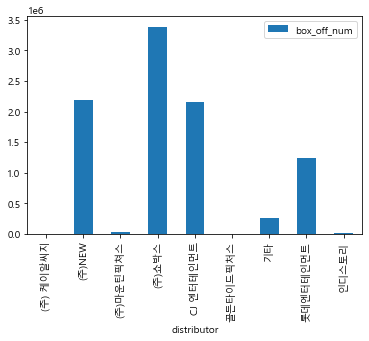

In [14]:
import platform

# Window
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')

distributor_boxOffNum.mean().plot.bar()
plt.show()

관객 수가 비교도 할 수 없을 만큼 적은 경우는 기타로 다시 편입시켜 주자.

확실히 다른 배급사에 비해 배급한 영화가 많은 메이저 배급사들이 관객이 많다.

한편, 인디스트리와 골든타이드픽쳐스는 배급이 많은데도 관객 수가 적다.

데이터에서 적지 않은 비율을 차지하므로 일단 보류

In [15]:
for idx, data in enumerate(train['distributor']) :
    if data in ['(주) 케이알씨지', '(주)마운틴픽쳐스']:
        train['distributor'][idx] = '기타'

C:\Users\korea_1\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


이제 장르를 살펴보자

In [16]:
genre = train['genre'].value_counts()
genre

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

뮤지컬과 서스펜스의 수는 너무 적다.

염두에 두고 더 살펴보자

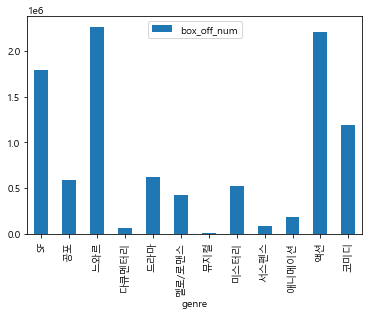

In [17]:
genre_boxOffNum = train[['genre', 'box_off_num']].groupby('genre').mean()
genre_boxOffNum.plot.bar()

배급사와 마찬가지로 각 항목마다 target값이 천차만별이다.

배급사와 장르 모두 target값에 큰 영향을 끼치는 것 같다.

뮤지컬과 서스펜스는 둘 다 값 자체도 별로 없고 관객도 별로 없으니 기타로 묶어버리자.

이는 예상못한 장르 값어와도 처리할 수 있게 해줄 것이다.

다큐멘터리와 애니메이션은 어느정도의 데이터가 존재하니 그대로 두자.

In [18]:
for idx, data in enumerate(train['genre']) :
    if data not in ['SF', '공포', '느와르', '다큐멘터리', '드라마', '멜로/로맨스', '미스터리', '애니메이션', '액션', '코미디']:
        train['genre'][idx] = '기타'

C:\Users\korea_1\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
train['genre'].value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
기타          7
Name: genre, dtype: int64

다음은 날짜 데이터를 살펴보자.

날짜를 연도와 월, 일로 나누어보자.

In [20]:
train['release_time']

0      2012-11-22
1      2015-11-19
2      2013-06-05
3      2012-07-12
4      2010-11-04
          ...    
595    2014-08-13
596    2013-03-14
597    2010-09-30
598    2015-05-14
599    2013-01-30
Name: release_time, Length: 600, dtype: object

In [21]:
train['release_time'] = pd.to_datetime(train['release_time'], format='%Y-%m-%d')

In [22]:
train['year'] = train['release_time'].dt.year

In [23]:
train['month'] = train['release_time'].dt.month

일은 크게 데이터에 영향을 끼치지 않을 것이라 생각하고, 그보다는 요일을 만들어보자.

In [24]:
# 요일은 일단 숫자로, 0부터 월요일
train['day_of_week'] = train['release_time'].dt.weekday

In [25]:
train

,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month,day_of_week
0,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,nan,0,91,2,23398,2012,11,3
1,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,3,7072501,2015,11,3
2,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25000,4,343,4,6959083,2013,6,2
3,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00000,2,20,6,217866,2012,7,3
4,기타,코미디,2010-11-04,108,15세 관람가,신근호,1.00000,1,251,2,483387,2010,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00000,1,510,7,1475091,2014,8,2
596,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00000,1,286,6,1716438,2013,3,3
597,기타,공포,2010-09-30,99,청소년 관람불가,김대현,nan,0,123,4,2475,2010,9,3
598,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,nan,0,431,4,2192525,2015,5,3


이제 날짜는 필요없으므로 버리자.

In [26]:
train = train.drop('release_time', axis=1)

연도부터 차근차근히 살펴보자

In [27]:
train['year'].value_counts()

2014    127
2015    120
2013     95
2010     90
2012     88
2011     80
Name: year, dtype: int64

2010~2015년의 데이터들로 구성된다. 이 연도와 관객수의 관계를 살펴보자.

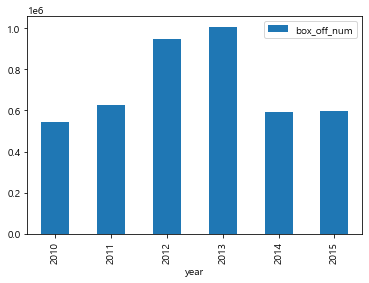

In [28]:
year_boxOffNum = train[['year', 'box_off_num']].groupby('year').mean()
year_boxOffNum.plot.bar()

2012-2013년이 유난히 관객수가 많다.

한편, 다행히도 test_data를 살펴본 결과 이 역시 2010년~2015년으로 이루어져 있다.

2010-2015년 사이의 영화의 관객수만 예측한다면 이 데이터는 의미있는 데이터일 수 있다.




아무튼 이제 월별로 살펴보자.

In [29]:
month = train['month'].value_counts()
month

11    72
10    60
9     60
5     57
8     55
3     52
12    49
7     49
4     47
1     39
2     31
6     29
Name: month, dtype: int64

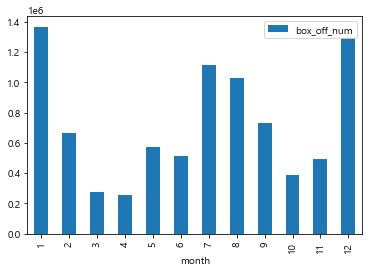

In [30]:
month_boxOffNum = train[['month', 'box_off_num']].groupby('month').mean()
month_boxOffNum.plot.bar()

야외 활동이 힘든 한겨울, 한여름에 관객이 많다.

계절별로 월을 나누거나 야외활동이 힘든 달, 힘들지 않은 달로 데이터를 나누면 좋을 것 같다.

In [31]:
train['season'] = 0
train['outdoor'] = 0

for idx, data in enumerate(train['month']) :
    if data >= 3 and data <= 5 :
        train['season'][idx] = 1
    elif data >= 6 and data <= 8 :
        train['season'][idx] = 2
    elif data >= 9 and data <= 11 :
        train['season'][idx] = 3
    else :
        train['season'][idx] = 4
for idx, data in enumerate(train['month']) :
    if data == 7 or data == 8 or data == 12 or data == 1 :
        train['outdoor'][idx] = 0
    else :
        train['outdoor'][idx] = 1

C:\Users\korea_1\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\korea_1\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\korea_1\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\korea_1\anaconda3\lib\site-

만든 김에 target 값에 얼마나 상관있나 확인해보자.

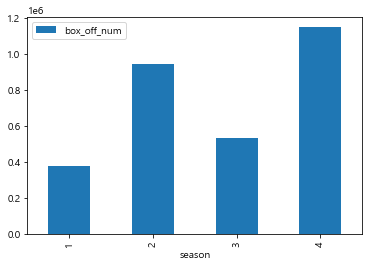

In [32]:
season_boxOffNum = train[['season', 'box_off_num']].groupby('season').mean()
season_boxOffNum.plot.bar()

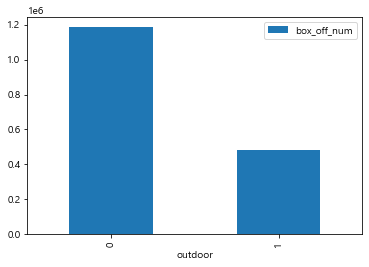

In [33]:
outdoor_boxOffNum = train[['outdoor', 'box_off_num']].groupby('outdoor').mean()
outdoor_boxOffNum.plot.bar()

아주 의미있어 보인다.

이제 요일이 target값에 미치는 영향을 살펴보자.

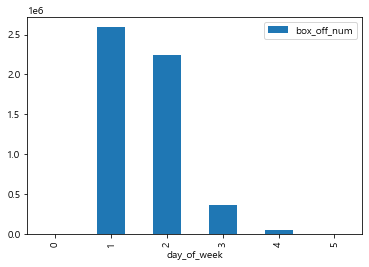

In [34]:
day_of_week_boxOffNum = train[['day_of_week', 'box_off_num']].groupby('day_of_week').mean()
day_of_week_boxOffNum.plot.bar()

In [35]:
train['day_of_week'].value_counts()

3    484
2    107
0      4
4      2
1      2
5      1
Name: day_of_week, dtype: int64

6은 존재하지도 않고, 1에 해당하는 요일에 영화 개봉 시 가장 관객이 많은 것처럼 보이지만, 해당 데이터는 2개밖에 없으므로 신뢰할 수 없다. 0, 5에 해당하는 요일에 개봉하면 관객이 적어보이는 것 역시 데이터가 적으므로 신뢰할 수 없다. 따라서 요일 데이터는 좋은 데이터가 아닌 것으로 보인다.

In [36]:
train = train.drop("day_of_week", axis=1)

관람 등급을 살펴보자.

In [37]:
train['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

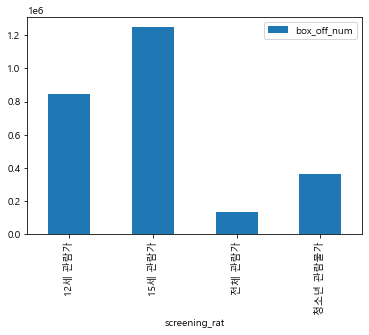

In [38]:
screening_rat_boxOffNum = train[['screening_rat', 'box_off_num']].groupby('screening_rat').mean()
screening_rat_boxOffNum.plot.bar()

관람등급도 어쨌든 숫자로 매핑해줘야 한다.

여기서 고민이 관람등급은 전체-12-15-19로 순서가 있는 편이라 원핫 인코딩이 아닌, 1-4로 매핑해줘도 될 듯 한데, 

이 순서를 전체 12 15 19로 할 지, 아니면 target 값에 영향을 크게 미치는 순서대로 해야할 지 모르겠다.

일단, 관람 등급별로 차이가 뚜렷하고, 선형 모델의 경우 숫자가 크면 가중치를 더 받을 수 있으므로 target값 순서대로 하고, 두 방법을 비교해보자.

In [39]:
for idx, data in enumerate(train['screening_rat']) :
    if data == '전체 관람가' :
        train['screening_rat'][idx] = 1
    elif data == '청소년 관람불가' :
        train['screening_rat'][idx] = 2
    elif data == '12세 관람가' :
        train['screening_rat'][idx] = 3
    else :
        train['screening_rat'][idx] = 4

C:\Users\korea_1\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\korea_1\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\korea_1\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [40]:
train['screening_rat'].value_counts()

2    204
4    202
3    102
1     92
Name: screening_rat, dtype: int64

이제 감독을 살펴보자.

In [41]:
director = train['director'].value_counts()
director

홍상수         7
신재호         4
우민호         4
노진수         4
장률          4
           ..
신성섭         1
하마구치 류스케    1
송정우         1
정호현         1
박진표         1
Name: director, Length: 472, dtype: int64

In [42]:
director[director == 1]

이돈구         1
박사유         1
노성수         1
박헌수         1
신정원         1
           ..
신성섭         1
하마구치 류스케    1
송정우         1
정호현         1
박진표         1
Name: director, Length: 373, dtype: int64

In [43]:
director[director > 2]

홍상수       7
신재호       4
우민호       4
노진수       4
장률        4
전규환       4
윤여창       3
김봉은       3
박철수       3
정성복       3
신연식       3
조조 히데오    3
오멸        3
장진        3
권칠인       3
김현석       3
전수일       3
김조광수      3
조성규       3
김기덕       3
Name: director, dtype: int64

절반 이상의 감독이 작품이 1개 뿐이며 가장 많은 감독의 작품도 7개 밖에 되지 않는다.

데이터에 비해 각 값의 비중이 너무 작기에 이를 이용해 제대로 된 예측을 할 수 없다고 판단하여 해당 칼럼을 삭제한다.

In [44]:
train = train.drop('director', axis=1)

In [45]:
train = train.drop('month', axis=1)

앞에서 미뤄둔 원핫 인코딩을 진행하고, month 데이터도 계절과 야외활동 여부로 활용했으니 삭제했다.

In [46]:
train = pd.get_dummies(train, columns = ['distributor', 'genre'])

연도의 숫자가 너무 큰 것도 문제가 될 수 있다. 교정하자.

한편, 관람등급처럼 제일 많은 연도에 높은 숫자를 두고, 제일 적은 연도에 낮은 숫자를 두고 싶지만, 연도는 확실한 연속 데이터이고, 다른 연도 데이터가 들어올 수도 있다는 가정 하에 순차적으로 진행했따.

In [47]:
train.columns

Index(['time', 'screening_rat', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff',
       'num_actor', 'box_off_num', 'year', 'season', 'outdoor',
       'distributor_(주)NEW', 'distributor_(주)쇼박스', 'distributor_CJ 엔터테인먼트',
       'distributor_골든타이드픽처스', 'distributor_기타', 'distributor_롯데엔터테인먼트',
       'distributor_인디스토리', 'genre_SF', 'genre_공포', 'genre_기타', 'genre_느와르',
       'genre_다큐멘터리', 'genre_드라마', 'genre_멜로/로맨스', 'genre_미스터리', 'genre_애니메이션',
       'genre_액션', 'genre_코미디'],
      dtype='object')

In [48]:
for idx, data in enumerate(train['year']) :
    train['year'][idx] = int(data)-2009

C:\Users\korea_1\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


한편, 수치형 데이터를 보기 전에 target 값의 분포를 알아보자. 중앙 집중형 그래프가 나와야 좋은 것이다.

(array([514.,  45.,  15.,   9.,   3.,   4.,   4.,   1.,   3.,   2.]),
 array([1.00000000e+00, 1.42627750e+06, 2.85255400e+06, 4.27883050e+06,
        5.70510700e+06, 7.13138350e+06, 8.55766000e+06, 9.98393650e+06,
        1.14102130e+07, 1.28364895e+07, 1.42627660e+07]),
 <a list of 10 Patch objects>)

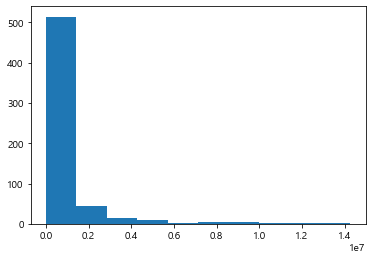

In [49]:
plt.hist(train['box_off_num'])

좌측으로 쏠려있다. 이런 경우 로그변환을 하는 것이 좋다.

In [50]:
train['box_off_num'] = np.log1p(train['box_off_num'])

(array([  3.,   3.,  25., 105., 124.,  79.,  55.,  67.,  98.,  41.]),
 array([ 0.69314718,  2.27114876,  3.84915034,  5.42715192,  7.00515351,
         8.58315509, 10.16115667, 11.73915825, 13.31715983, 14.89516141,
        16.47316299]),
 <a list of 10 Patch objects>)

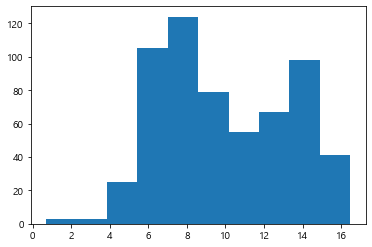

In [56]:
plt.hist(train['box_off_num'])

이제 수치형 데이터를 살펴보자.

먼저 상영 시간에 대해 살펴보자.

In [57]:
train['time'].describe()

count   600.00000
mean    100.86333
std      18.09753
min      45.00000
25%      89.00000
50%     100.00000
75%     114.00000
max     180.00000
Name: time, dtype: float64

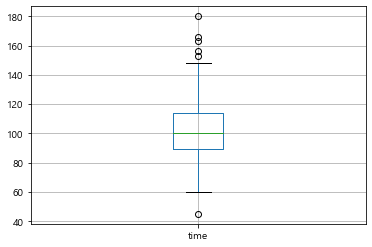

In [58]:
train.boxplot(column=['time'])

이상치의 개수가 적긴 하지만 존재하긴 한다. 이는 모델로 테스트 한 뒤 해당 칼럼의 중요도를 판단한 뒤 결정해야 할 것 같다.

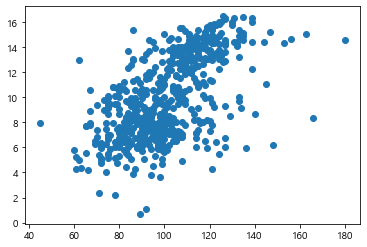

In [59]:
plt.scatter(x=train['time'], y=train['box_off_num'])

(array([  1.,  21., 103., 159., 157., 112.,  37.,   5.,   4.,   1.]),
 array([ 45. ,  58.5,  72. ,  85.5,  99. , 112.5, 126. , 139.5, 153. ,
        166.5, 180. ]),
 <a list of 10 Patch objects>)

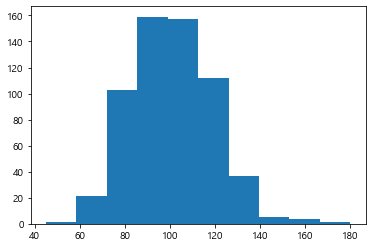

In [60]:
plt.hist(train['time'])

그 다음은 감독의 전작을 보자. 전작의 관객 수는 널값이 너무 많으므로 제거한다.

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time                   600 non-null    int64  
 1   screening_rat          600 non-null    object 
 2   dir_prev_bfnum         270 non-null    float64
 3   dir_prev_num           600 non-null    int64  
 4   num_staff              600 non-null    int64  
 5   num_actor              600 non-null    int64  
 6   box_off_num            600 non-null    float64
 7   year                   600 non-null    int64  
 8   season                 600 non-null    int64  
 9   outdoor                600 non-null    int64  
 10  distributor_(주)NEW     600 non-null    uint8  
 11  distributor_(주)쇼박스     600 non-null    uint8  
 12  distributor_CJ 엔터테인먼트  600 non-null    uint8  
 13  distributor_골든타이드픽처스   600 non-null    uint8  
 14  distributor_기타         600 non-null    uint8  
 15  distri

In [62]:
train = train.drop('dir_prev_bfnum', axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b2a411b908>,
 'caps': [<matplotlib.lines.Line2D at 0x1b2a4120708>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b2a4117f88>],
 'medians': [<matplotlib.lines.Line2D at 0x1b2a4120f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b2a4126c88>],
 'means': []}

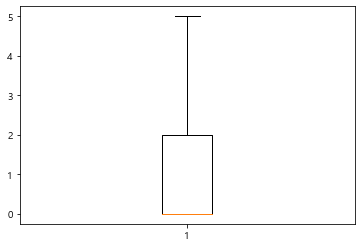

In [63]:
plt.boxplot(train['dir_prev_num'])

(array([330.,   0., 113.,   0.,  86.,   0.,  47.,   0.,  20.,   4.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

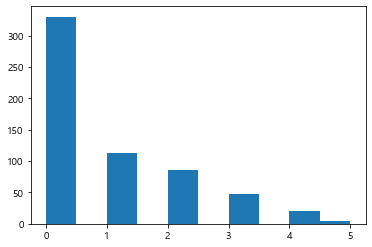

In [64]:
plt.hist(train['dir_prev_num'])

In [65]:
train['dir_prev_num'].value_counts()

0    330
1    113
2     86
3     47
4     20
5      4
Name: dir_prev_num, dtype: int64

사실상 카테고리 값과 거의 같다. 따라서 데이터가 쏠려있어도 로그변환은 하지 않는 걸로 하자.

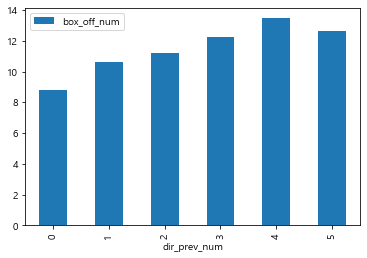

In [68]:
dir_prev_num_boxOffNum = train[['dir_prev_num', 'box_off_num']].groupby('dir_prev_num').mean()
dir_prev_num_boxOffNum.plot.bar()

스태프 수

{'whiskers': [<matplotlib.lines.Line2D at 0x1b2a44e2dc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1b2a44e6bc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b2a44e2588>],
 'medians': [<matplotlib.lines.Line2D at 0x1b2a44eca48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b2a44ecb88>],
 'means': []}

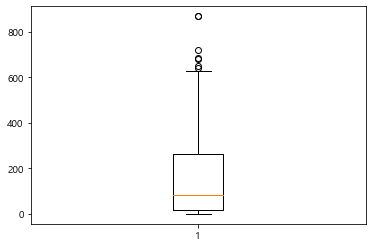

In [70]:
plt.boxplot(train['num_staff'])

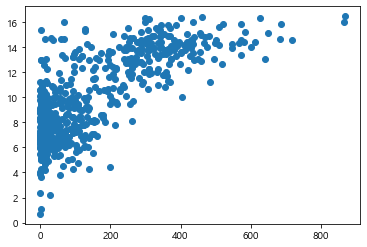

In [71]:
plt.scatter(train['num_staff'], train['box_off_num'])

(array([304.,  89.,  51.,  69.,  46.,  23.,   9.,   6.,   1.,   2.]),
 array([  0. ,  86.9, 173.8, 260.7, 347.6, 434.5, 521.4, 608.3, 695.2,
        782.1, 869. ]),
 <a list of 10 Patch objects>)

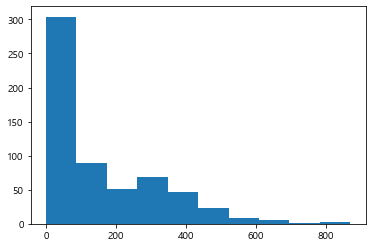

In [69]:
plt.hist(train['num_staff'])

바로 로그변환하자.

In [72]:
train['num_staff'] = np.log1p(train['num_staff'])

(array([ 32.,  30.,  34.,  35.,  63.,  67.,  82.,  78., 143.,  36.]),
 array([0.        , 0.67684932, 1.35369864, 2.03054796, 2.70739728,
        3.38424661, 4.06109593, 4.73794525, 5.41479457, 6.09164389,
        6.76849321]),
 <a list of 10 Patch objects>)

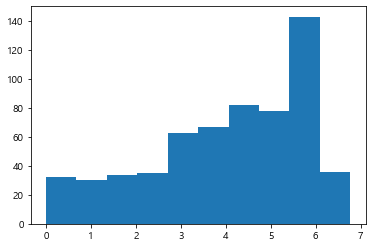

In [73]:
plt.hist(train['num_staff'])

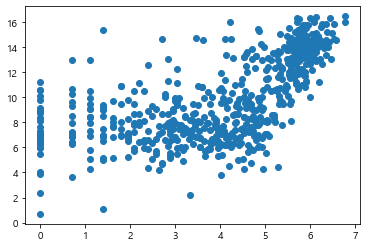

In [74]:
plt.scatter(train['num_staff'], train['box_off_num'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b2a565dd08>,
 'caps': [<matplotlib.lines.Line2D at 0x1b2a5662b08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b2a565d4c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1b2a5667988>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b2a5667ac8>],
 'means': []}

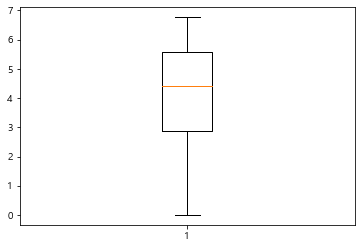

In [75]:
plt.boxplot(train['num_staff'])

주연 배우 수

{'whiskers': [<matplotlib.lines.Line2D at 0x1b2a56c5f48>,
 'caps': [<matplotlib.lines.Line2D at 0x1b2a56cbe08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b2a56c5d88>],
 'medians': [<matplotlib.lines.Line2D at 0x1b2a56d0c48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b2a56d6988>],
 'means': []}

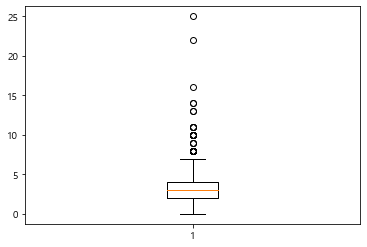

In [76]:
plt.boxplot(train['num_actor'])

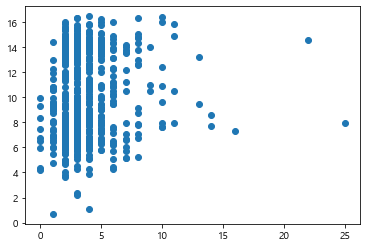

In [77]:
plt.scatter(train['num_actor'], train['box_off_num'])

(array([198., 257., 107.,  19.,  12.,   4.,   1.,   0.,   1.,   1.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <a list of 10 Patch objects>)

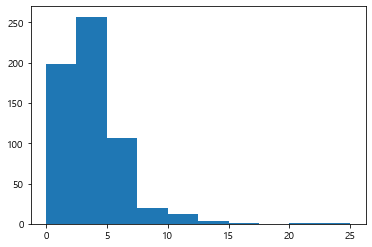

In [78]:
plt.hist(train['num_actor'])

In [79]:
train['num_actor'] = np.log1p(train['num_actor'])

(array([  9.,   0.,  35., 154., 257.,  91.,  32.,  15.,   5.,   2.]),
 array([0.        , 0.32580965, 0.65161931, 0.97742896, 1.30323862,
        1.62904827, 1.95485792, 2.28066758, 2.60647723, 2.93228688,
        3.25809654]),
 <a list of 10 Patch objects>)

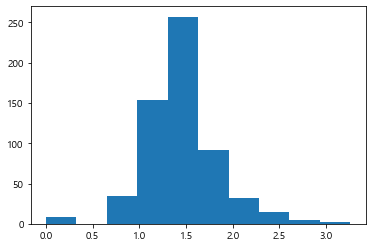

In [80]:
plt.hist(train['num_actor'])

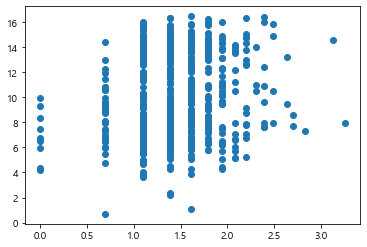

In [81]:
plt.scatter(train['num_actor'], train['box_off_num'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b2a5905f88>,
 'caps': [<matplotlib.lines.Line2D at 0x1b2a5909e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b2a5905dc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1b2a590fc88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b2a59159c8>],
 'means': []}

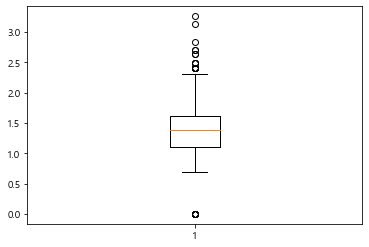

In [82]:
plt.boxplot(train['num_actor'])

주연 배우의 수가 0인건 너무 이상하다. 모델을 돌려보며 적당히 제거 여부를 판단하자.